In [1]:
# Required Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import plotly.plotly as py

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#For LR
import statsmodels.api as sm
#For LR That looks like R
import statsmodels.formula.api as smf

from statsmodels.graphics.mosaicplot import mosaic

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

print("Packages LOADED")

Packages LOADED


In [2]:
data = pd.read_csv('diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Several constraints were placed on the selection of these instances from a 
#larger database. In particular, all patients here are females at least 21 years
#old of Pima Indian heritage.
#Now we have one target Variable that is binary.
#This leaves us with 8 variables
#Out of the 8 Pregnancies can be considered as a factor
#The pending 7 variables are continous numeric

#For every data analysis problem let us first plot the target variable against
#all the independent variable.

#For two factor variables we can use a stacked bar plot or a mosaic plot
#For one factor and other numeric , a box plot will do
#For two numeric variables , a scatter plot is perfect


In [3]:
%matplotlib inline

(<matplotlib.figure.Figure at 0x1bbfa3fec18>,
 OrderedDict([(('6', '1'),
               (0.0, 0.0, 0.06028163580246913, 0.31893687707641194)),
              (('6', '0'),
               (0.0,
                0.32225913621262459,
                0.06028163580246913,
                0.6777408637873753)),
              (('1', '1'),
               (0.06491126543209877,
                0.0,
                0.16276041666666666,
                0.21410114433370245)),
              (('1', '0'),
               (0.06491126543209877,
                0.21742340346991507,
                0.16276041666666666,
                0.78257659653008482)),
              (('8', '1'),
               (0.23230131172839502,
                0.0,
                0.04581404320987653,
                0.57702395523692951)),
              (('8', '0'),
               (0.23230131172839502,
                0.58034621437314216,
                0.04581404320987653,
                0.41965378562685779)),
              (('0', 

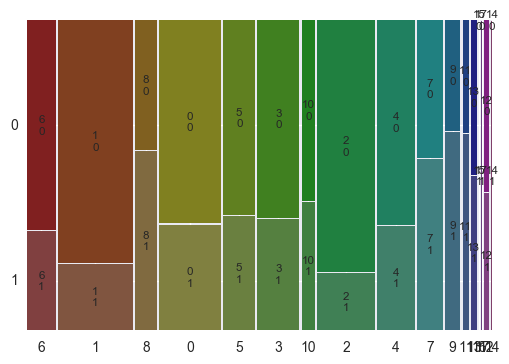

In [21]:
mosaic(data, ['Pregnancies','Outcome'])

#Inference-> Women pregnant more than 15 times have no diabetes,
#Women pregnat between 0-6 times have a lower probability of diabetes


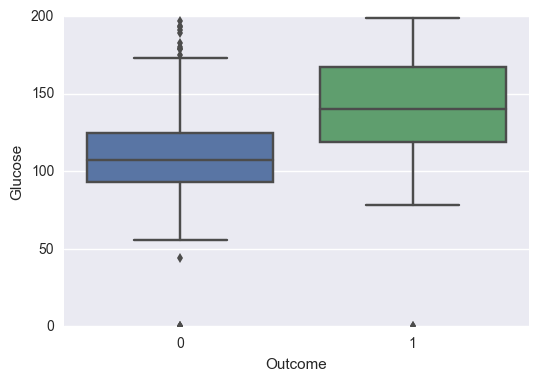

In [22]:
sns.boxplot(data.Outcome,data.Glucose)

#Inference-> Women Having diabetes usually have higher glucose values,
#However we cannot say this with extreme confidence as women who dont 
#have diabetes can also have high glucose values

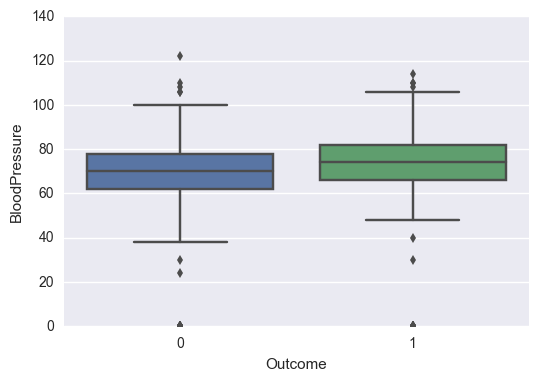

In [12]:
sns.boxplot(data.Outcome,data.BloodPressure)

#Inference-> Women Having diabetes usually have higher Blood pressure,
#However we cannot cosinder blood pressure to determine diabetes


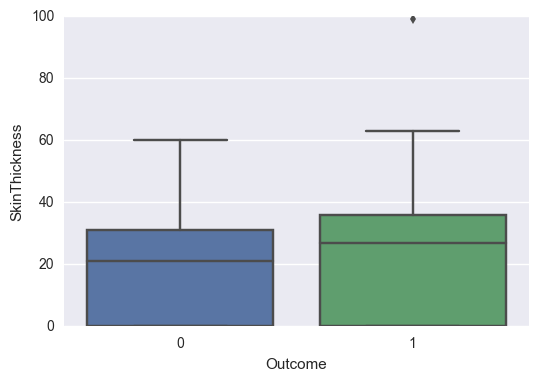

In [13]:
sns.boxplot(data.Outcome,data.SkinThickness)

#Inference-> Women Having diabetes usually have more skin Thickness

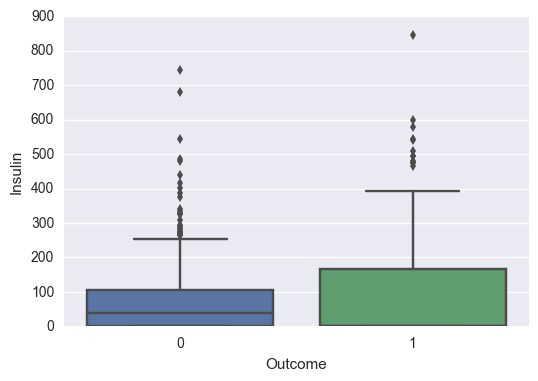

In [23]:
sns.boxplot(data.Outcome,data.Insulin)

#Inference-> Women Having diabetes usually have outlier levels of insulin distributed
#on the max and min side, but mostly on the down side


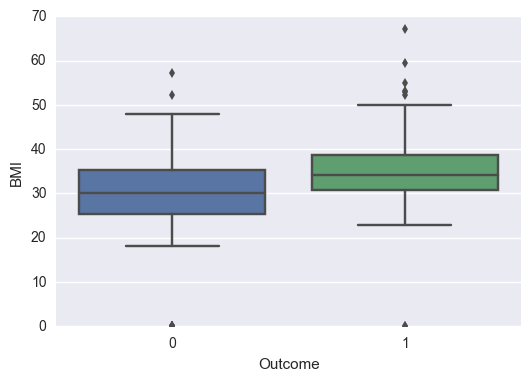

In [15]:
sns.boxplot(data.Outcome,data.BMI)

#Inference-> Women Having diabetes usually have Considerbaly high level of BMI as expected

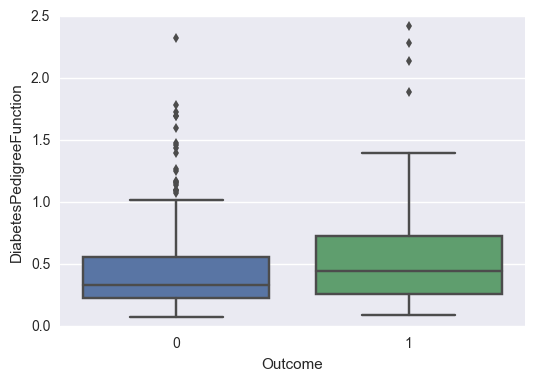

In [16]:
sns.boxplot(data.Outcome,data.DiabetesPedigreeFunction)

#Inference-> Women Having diabetes usually have Considerbaly higher values

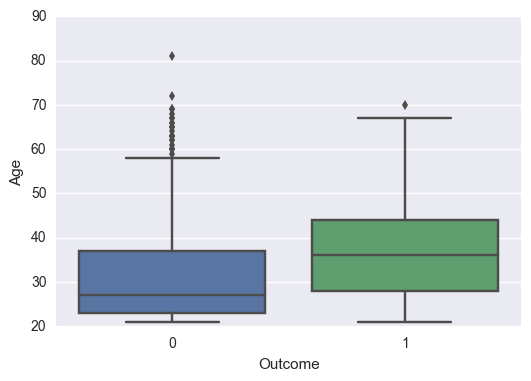

In [18]:
sns.boxplot(data.Outcome,data.Age)

#Inference-> Age doesnt play any role wrt diabetes

In [20]:
data_n=data[['Glucose','Age','DiabetesPedigreeFunction','BMI','Insulin','SkinThickness','BloodPressure']]

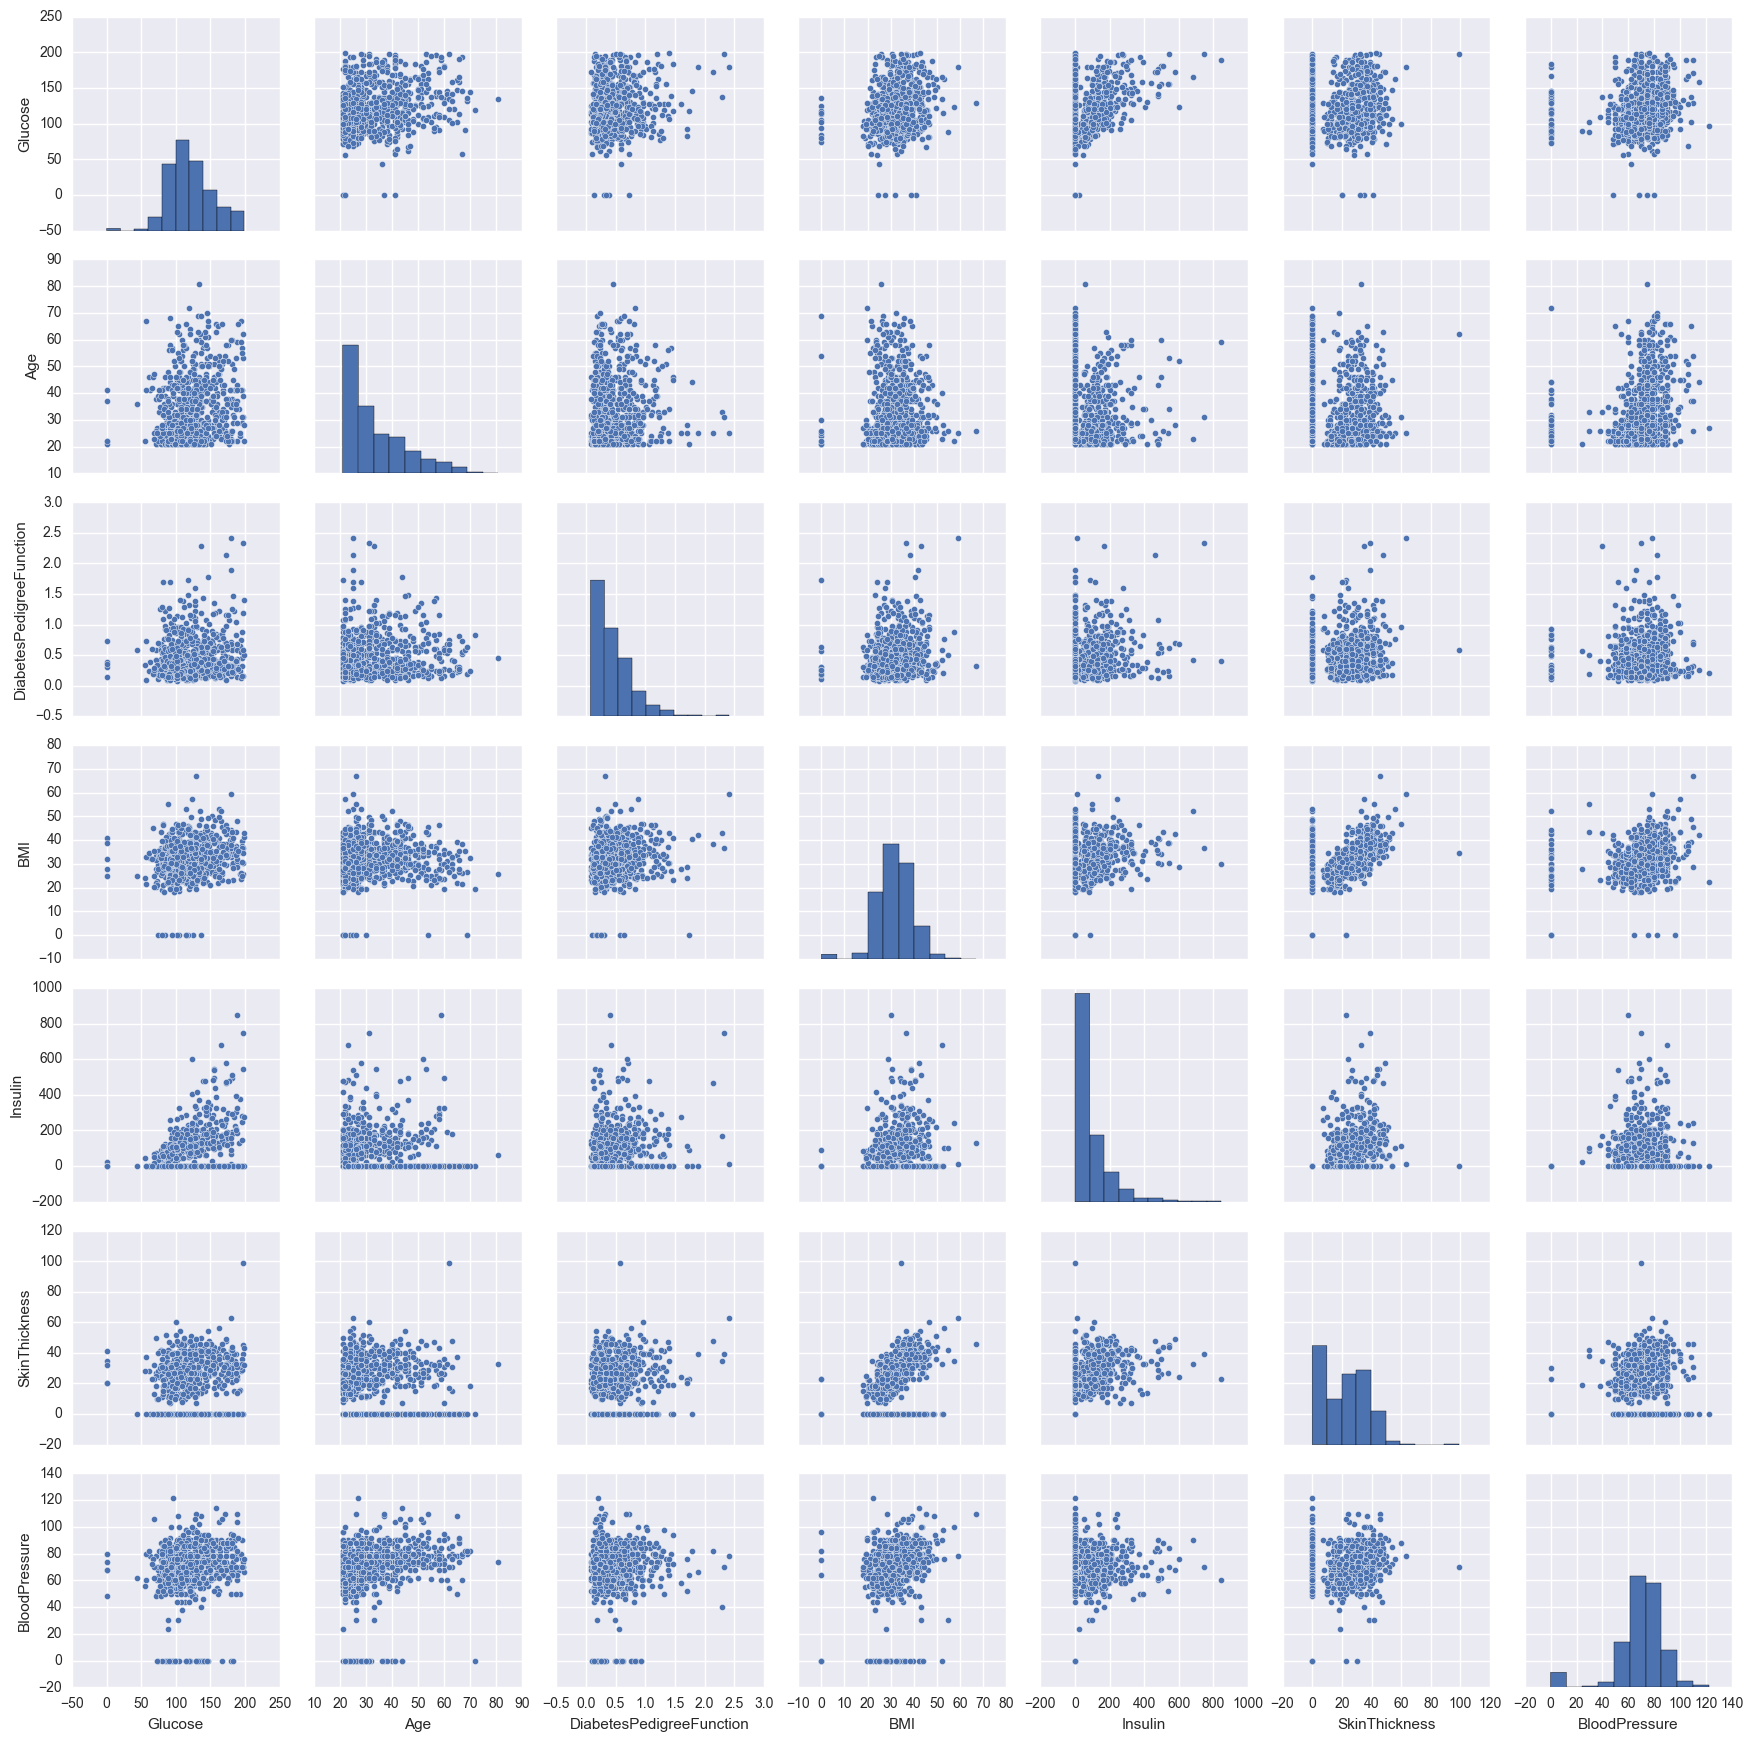

In [24]:
sns.pairplot(data_n)

#Inference ->   SkinThickness and BMI have a Linear RelationShip
#Glucose and Insulin also are slightly Linear

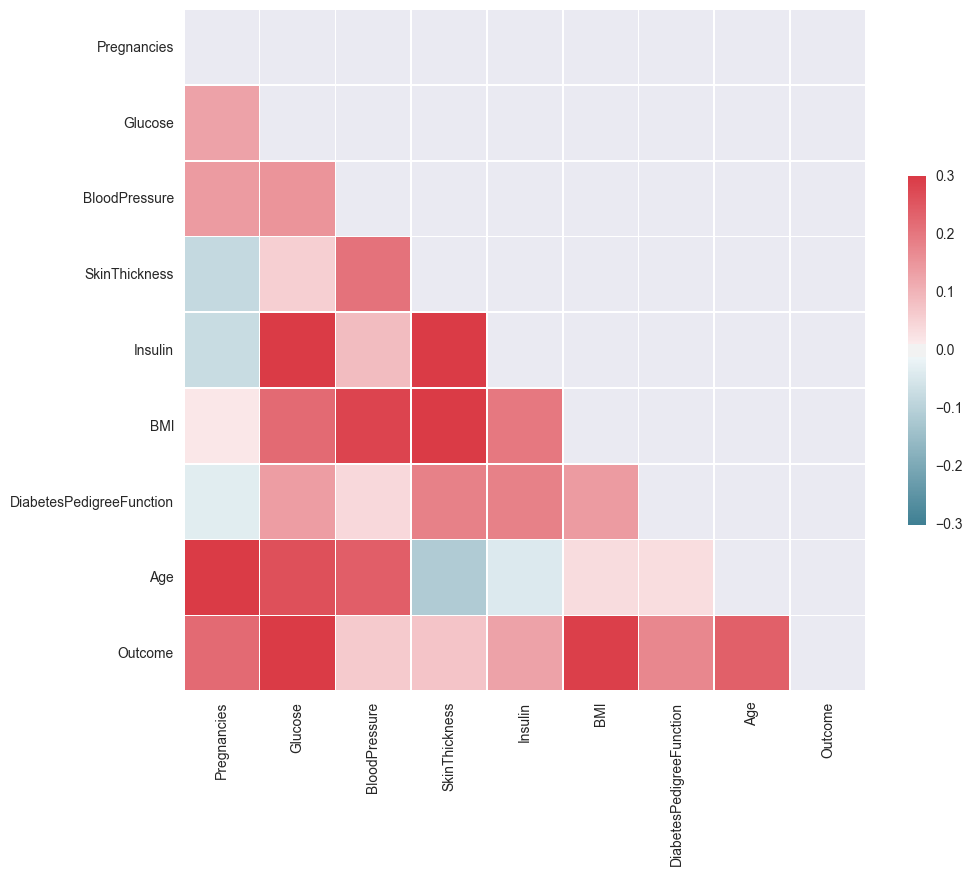

In [4]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

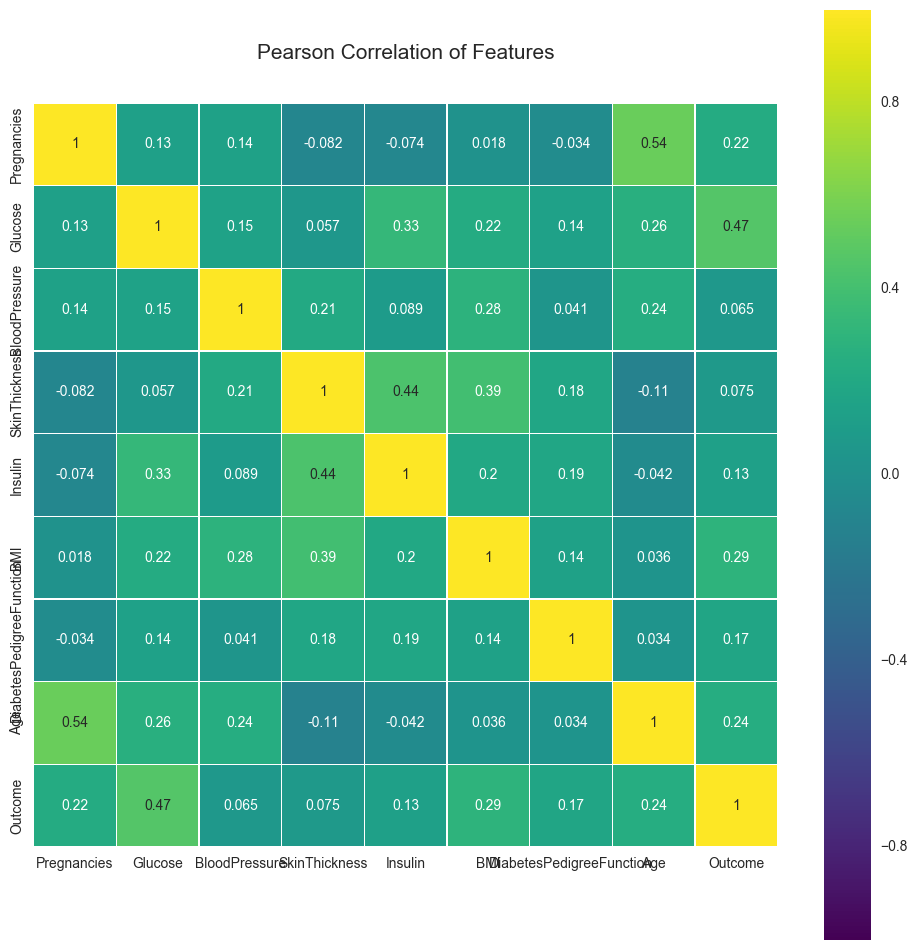

In [5]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#Inference -> Age and Pregnancies are highly correlated
#Insulin and Blood Pressure are highly correlated

In [27]:
X=data_n.values
#Scaling the values
X = scale(X)
pca = PCA(n_components=7)
pca.fit(X)

PCA(copy=True, n_components=7, whiten=False)

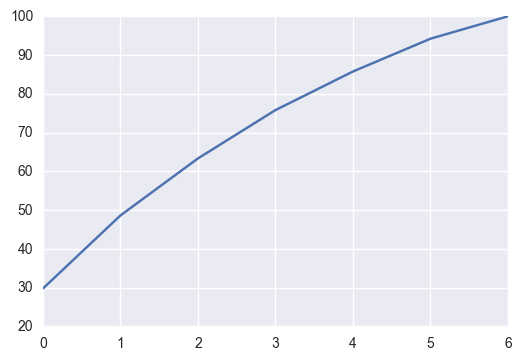

In [28]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [29]:
pca = PCA(n_components=7)
pca.fit(X)
X1=pca.fit_transform(X)
print(X1)

[[-0.87948019  1.14208316 -0.08166327 ...,  0.096222   -0.85682588
   1.11315693]
 [ 0.98549952 -0.58981021  0.70399218 ..., -0.60940922 -0.44331484
   0.49080718]
 [ 0.64279148  1.20482953 -1.73965846 ...,  0.53494694  1.30577219
   0.83540717]
 ..., 
 [ 0.3130743  -0.17563054  0.06981267 ..., -0.64341304  0.23803363
   0.22008432]
 [ 1.10189812  1.46138294 -0.38148783 ...,  0.39410179 -0.46118919
  -0.2984699 ]
 [ 0.65396047 -0.97207325  0.99598882 ..., -0.14678132  0.03878129
   0.55538933]]


In [30]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=data_n.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7
Glucose,-0.373984,0.369520,-0.455002,0.343901,0.328511,0.320114,0.433479
Age,-0.122501,0.719840,-0.062218,-0.100666,-0.211714,-0.634212,-0.075963
DiabetesPedigreeFunction,-0.283344,-0.103002,-0.437023,-0.837390,-0.025986,0.125128,-0.023739
BMI,-0.461456,-0.037007,0.362199,-0.066531,0.708881,-0.173430,-0.342759
Insulin,-0.461242,-0.238617,-0.342281,0.389361,-0.378060,-0.016179,-0.564242
SkinThickness,-0.473368,-0.395879,0.225891,0.025011,-0.240640,-0.376353,0.606631
BloodPressure,-0.339238,0.345901,0.546573,-0.117144,-0.378460,0.554674,-0.043692


In [36]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7'], index=data_n.index)
#df_plot

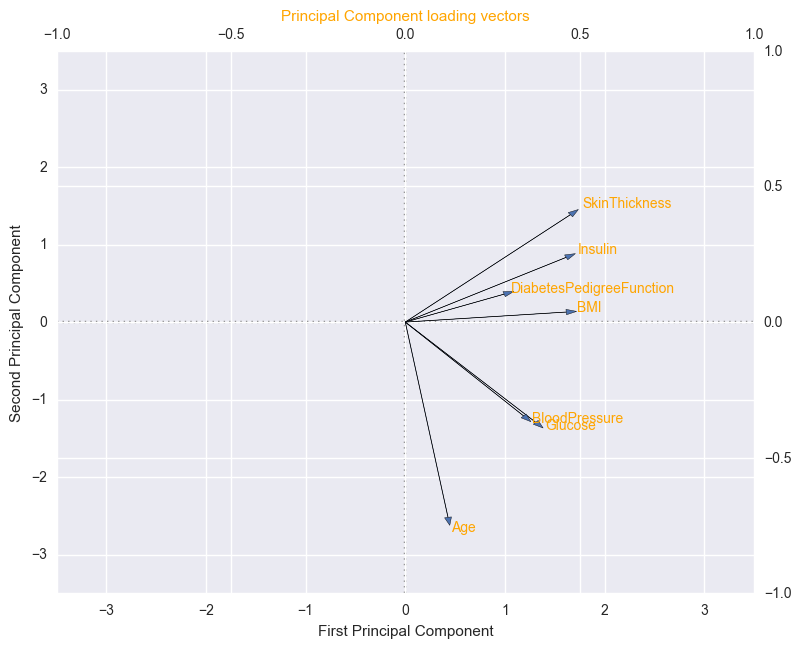

In [35]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
#for i in df_plot.index:
#   ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])
ax2.arrow(0,0,-pca_loadings.V1[4], -pca_loadings.V2[4])
ax2.arrow(0,0,-pca_loadings.V1[5], -pca_loadings.V2[5])
ax2.arrow(0,0,-pca_loadings.V1[6], -pca_loadings.V2[6]);

#Inference -> Blood pressure and glucose are highly correlated.
#Blood Pressure,Glucose , Age are Determining factors of diabetes
#for the people in the first principal component
#Skin Thickness and insulin are highly determining factors of diabetes
#for the people in the second principal component
#BMI fails to explain the Outcome variable and has least effect